In [18]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm
import seaborn as sns

In [70]:
def create_control_chart(): 
    # Generate example data
    np.random.seed(42)
    data = pd.DataFrame({
        'Date': pd.date_range('2022-01-01', '2022-01-31'),
        'Value': np.random.normal(loc=10, scale=2, size=31)  # Replace with your actual data
    })

    # Calculate control limits (mean +/- 3 times standard deviation for simplicity)
    mean_value = data['Value'].mean()
    std_dev = data['Value'].std()
    upper_limit = mean_value + 3 * std_dev
    lower_limit = mean_value - 3 * std_dev

    # Create control chart
    plt.figure()
    plt.plot(data['Date'], data['Value'], label='Values')
    plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Control Limit')
    plt.axhline(y=lower_limit, color='g', linestyle='--', label='Lower Control Limit')

    # Customize the plot
    plt.title('Control Chart')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    # Rotate the date labels vertically
    plt.xticks(rotation='vertical')

    # fig.show()
    img_name = 'control_chart.png'
    plt.savefig(img_name)    
    return img_name


In [73]:
def create_bell_curve_chart():
    # Generate example data
    np.random.seed(42)
    data = pd.DataFrame({
        'Value': np.random.normal(loc=10, scale=2, size=1000)  # Replace with your actual data
    })

    # Calculate mean and standard deviation
    mean_value = data['Value'].mean()
    std_dev = data['Value'].std()

    # Generate x values for the bell curve
    x_values = np.linspace(mean_value - 3 * std_dev, mean_value + 3 * std_dev, 1000)
    # Calculate corresponding y values using the normal distribution
    y_values = norm.pdf(x_values, mean_value, std_dev)

    # Create bell curve chart
    plt.figure()
    
    # Plot the bell curve
    plt.plot(x_values, y_values, label='Bell Curve')

    # Annotate mean, std
    plt.scatter([mean_value], [0], color='red', marker='o')
    plt.annotate('Mean', xy=(mean_value, 0), xytext=(mean_value, 0.02), ha='center', va='bottom', color='red')
    
    plt.scatter([mean_value + std_dev], [0], color='green', marker='o')
    plt.annotate('1 Std Dev', xy=(mean_value + std_dev, 0), xytext=(mean_value + std_dev, 0.02), ha='center', va='bottom', color='green')

    plt.scatter([mean_value - std_dev], [0], color='blue', marker='o')
    plt.annotate('-1 Std Dev', xy=(mean_value - std_dev, 0), xytext=(mean_value - std_dev, 0.02), ha='center', va='bottom', color='blue')

    # Customize plot
    plt.title('Bell Curve Chart with Mean and Std')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

    # Save the plot as an image
    img_name = 'bell_curve_chart.png'
    plt.savefig(img_name)

    return img_name

In [67]:
def create_histogram_bell_curve_chart():
    # Generate example data
    np.random.seed(42)
    data = np.random.normal(loc=10, scale=2, size=1000)  # Replace with your actual data

    plt.figure()
    
    # Create histogram
    plt.hist(data, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')

    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    # Plot the bell curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
        
    plt.plot(x, p, 'k', linewidth=2, label=f'Fit results:\n$\mu={mu:.2f}$, $\sigma={std:.2f}$')

    # Customize the plot
    plt.title('Histogram with Bell Curve Overlay')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    # plt.show()
    img_name = 'histogram_bell_curve_chart.png'
    plt.savefig(img_name)
    return img_name    

In [64]:
def create_box_plot():
    # Generate example data
    np.random.seed(42)
    data = [np.random.normal(0, 1, 100), np.random.normal(0, 1.5, 100), np.random.normal(0, 2, 100)]

    plt.figure()
    # Create box plot
    plt.boxplot(data, labels=['Group 1', 'Group 2', 'Group 3'])

    # Customize the plot
    plt.title('Box Plot Example')
    plt.xlabel('Groups')
    plt.ylabel('Values')

    # Show the plot
    # plt.show()
    img_name = 'box_plot.png'
    plt.savefig(img_name)
    return img_name



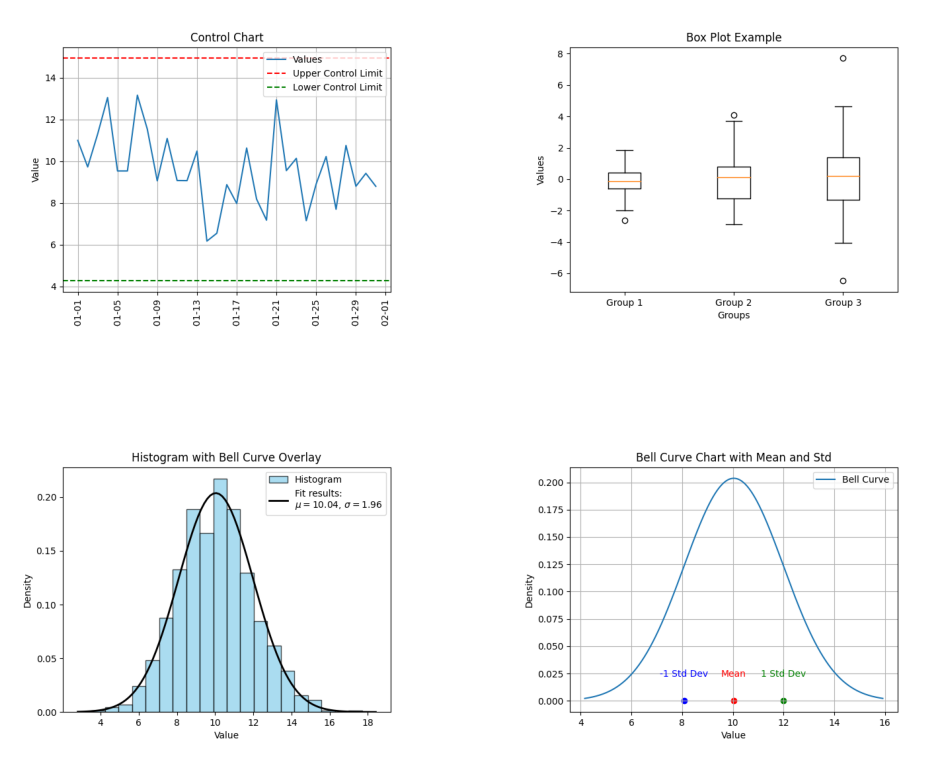

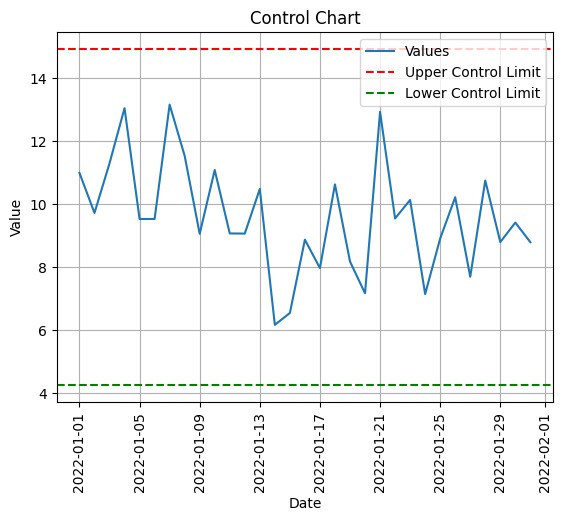

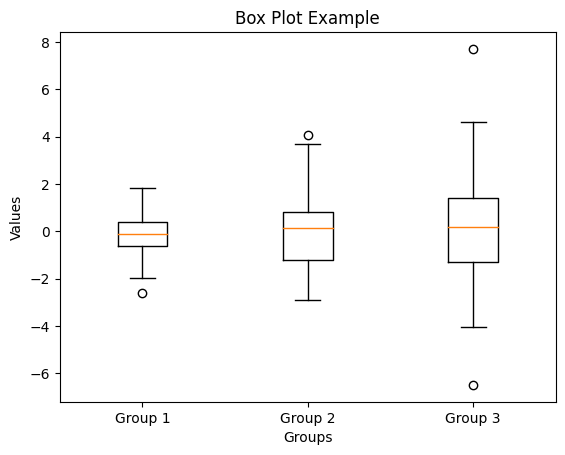

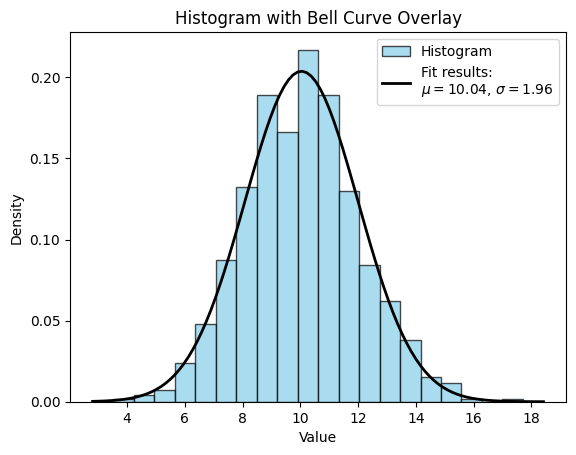

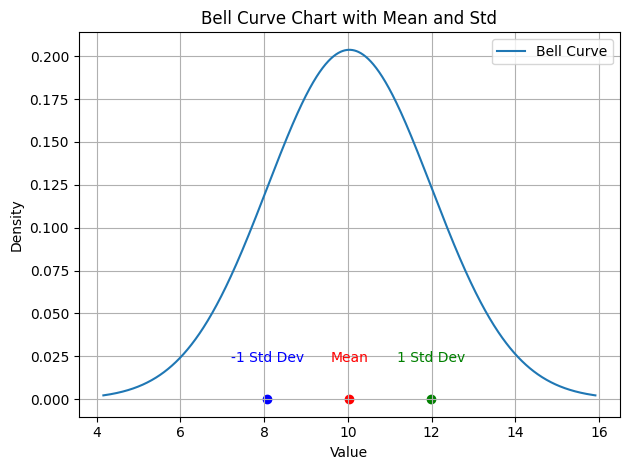

In [77]:
# Create subplots with a 2x2 grid layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Populate the subplots with saved images
# Cell 1: Control Chart
control_chart_image = create_control_chart()
axs[0, 0].imshow(plt.imread(control_chart_image))
axs[0, 0].axis('off')

# Cell 2: Box Plot
box_plot_image = create_box_plot()
axs[0, 1].imshow(plt.imread(box_plot_image))
axs[0, 1].axis('off')

# Cell 3: Histogram Bell Curve Overlay
histogram_image = create_histogram_bell_curve_chart()
axs[1, 0].imshow(plt.imread(histogram_image))
axs[1, 0].axis('off')

# Cell 4: Bell Curve
bell_curve = create_bell_curve_chart()
axs[1, 1].imshow(plt.imread(bell_curve))
axs[1, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
# plt.show()
# plt.savefig('manufacturing.png')
